# Lab 2: Exploring Image Data #

# 1 Business Understanding

## 1.1 Background

Facial recognition is used in a variety of ways within the tech industry. One example is Facebook's automatic tagging. When a user posts a picture of themselves and their friends, Facebook will look at the picture and tag any of the user's friends with their profile. No longer do users have to manually tag their friends on posts. Another use of facial recognition is identifying endangered species in the wild to protect them. With a collection of well-positioned cameras, park rangers and researchers are able to easily monitor wildlife remotely, and the use of facial recognition software allows them to automatically track the locations of endangered species as well as poachers. The popular use of facial modifications through the use of filters such as those found in the popular mobile application *SnapChat* demonstrate that this technology is a useful tool in social media and entertainment industry, as well.

Creating classification models for animal breeds provide a variety of uses. According to the American Humane Society, 10 million household pets are lost every year in the United States. Only a fraction of those pets end up in animal shelters, and many of them won't ever be reunited with their owners. Animal facial recognition technology can help pet owners find their lost pets in conjunction with the numerous public-facing cameras in city streets. Self-driving cars also greatly leverage the use of computer vision technology. Although car manufacturers are more concerened about human lives, animal-related car accidents and fatalities are not uncommon. Being able to identify a large moose on snowy Canadian roads could prevent major car accidents, and the ability to recognize a cat or dog on a road can prevent the loss of someone's pet. The usage of image recognition software is wide-ranging, but we know it is incredibly useful in today's world.

https://americanhumane.org/blog/every-day-is-tag-day-is-your-pet-protected/#:~:text=Each%20year%2C%20approximately%2010%20million,in%20the%20nation's%20animal%20shelters.

https://www.nathab.com/blog/self-driving-vehicles-could-save-animal-lives

## 1.2 Value Proposition

The cat and dog faces dataset is a subset of Cornell University's STARGan v2 dataset of high quality animal faces. These images are useful for solving image-to-image translation problems, where the goal is to learn the mapping between an input image and an output image. A practical application for this would be the use of computer-generated imagery in films and image-editing. Creating software that provides high qualilty, accurate, and fast image-to-image translation using these images can provide great value to the entertainment and other industries.

For our purpose, we are concerned with classifying these images and creating accurate captions. By generating accurate descriptions for these images as either cat or dog, we can help create better tools for animal shelters and wildlife protection organizations for in-depth animal identification tasks.

https://github.com/clovaai/stargan-v2

## 1.3 Measure of Success

Since there exists two different classes in our animal dataset, cat or dog, we expect our predictions to yield a nearly 100% success rate given inputs with the same quality of those within our dataset. The original purpose of the dataset was not image classification so we cannot create a measure of success based on a measure stated within the associated paper. But, as the classification task associated with the dataset will be binary, the classification must, at minimum, be better than coin flips yielding 50% accuracy.

## 1. Data Preparation

### 1.1 Data loading

* Each of our `cats` and `dogs` directories contain 2000 images of the said animal respectively (so 4000 images total)
* These images are loaded into their respective dataset containers, which for now will be a list of images
* To expedite our computatation, we will resize our images from 512 x 512 to 128 x 128 pixels

In [3]:
from typing import *
import cv2 # pip install opencv-python
import os 
import glob

def get_list_of_imgs(folder_path: str) -> List:
    data_path = os.path.join(folder_path,'*g') 
    files = glob.glob(data_path) 
    list_of_imgs = [] 
    for f1 in files: 
        img = cv2.imread(f1)
        img_resized = cv2.resize(img, dsize = (128, 128), interpolation = cv2.INTER_CUBIC)
        # img_resized = cv2.resize(img, dsize = (128, 128))
        list_of_imgs.append(img_resized)
    return list_of_imgs

list_of_cat_imgs = get_list_of_imgs('./cats')
list_of_dog_imgs = get_list_of_imgs('./dogs')

print(f'Loaded {len(list_of_cat_imgs)} cat images')
print(f'Loaded {len(list_of_cat_imgs)} dog images')

Loaded 2000 cat images
Loaded 2000 dog images


In [4]:
list_of_cat_imgs = get_list_of_imgs(cat_folder_path)
print(f'Loaded {len(list_of_cat_imgs)} cat images')

NameError: name 'cat_folder_path' is not defined

In [ ]:
list_of_dog_imgs = get_list_of_imgs(dog_folder_path)
print(f'Loaded {len(list_of_dog_imgs)} dog images')

*   All images in our dataset are grayscaled since
  * Color is not the most prominent distinguishing attribute between a cat and a dog
  * Luminance is more important in distinguisnig visual features of an image
  * Doing so further reduces the computational complexity of our analyses by allowing us to interact with a number representing a pixel instead of a 3-length (for RGB values) or 4-length (for BGBA values) array
* In addition, we now contain all of our images within Numpy arrays instead of Python lists since Numpy arrays
  * Take up less space
  * Are faster in terms of performing mathematical operations on a large number of data, which certainly is the case for us since we are working with image data, which contain large number of elements (at least 1 per every pixel)

In [ ]:
import numpy as np

def list_to_numpy_array(img):
    return np.asarray(img, dtype=np.float32)

def grayscale(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.144])

def grayscale_imgs(list_of_imgs):
    return list_to_numpy_array([grayscale(img) for img in list_of_imgs])

np_cats = grayscale_imgs(list_of_cat_imgs)
np_dogs = grayscale_imgs(list_of_dog_imgs)

Here, we ensure that all of our images are of the same size (i.e. are of the expected 126 x 128 dimensions)

In [ ]:
def get_height(img):
    return len(img)

def get_width(img):
    return len(img[0])

def check_all_imgs_same_dimensions(imgs, animal_type):
    h = get_height(imgs[0])
    w = get_width(imgs[0])
    h_set = set()
    w_set = set()
    for img in imgs:
        h_set.add(get_height(img))
        w_set.add(get_width(img))
    all_heights_are_equal = len(h_set) == 1
    all_widths_are_equal = len(w_set) == 1
    all_same_dimensions = all_heights_are_equal and all_widths_are_equal
    if all_heights_are_equal and all_widths_are_equal:
      print(f'All {animal_type} images have same width and height ({w} x {h})')
    else:
      print(f'All {animal_type} images DO NOT have same width and height ({w} x {h})')

check_all_imgs_same_dimensions(np_cats, 'cat')
check_all_imgs_same_dimensions(np_dogs, 'dog')

### 1.2 Image visualization

To ensure that our images have been properly grayscaled, that their resizing have not significantly distorted their image quality, and to provide a visual basis from which we will process our images, we print the first 18 images in each of our dataset.

In [ ]:
import matplotlib.pyplot as plt

def plot_gallery(images, titles=None, h=128, w=128, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles: plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
print('Gallery of Cats')
plot_gallery(np_cats)

In [ ]:
print('Gallery of Dogs')
plot_gallery(np_dogs)

### 1.3 Image linearization

To perform statistical analyses on our datasets, we flatten each of our images from its 

In [ ]:
import pandas as pd
import numpy as np

def flatten(img):
  return img.flatten()

def apply_to_all(imgs, func):
    return list_to_numpy_array([func(img) for img in imgs])

flatten_cats = apply_to_all(np_cats, flatten)
flatten_dogs = apply_to_all(np_dogs, flatten)

df_cat = pd.DataFrame.from_records(flatten_cats)
df_dog = pd.DataFrame.from_records(flatten_dogs)

In [ ]:
df_cat

In [ ]:
df_dog

# 2 Data Reduction

## 2.1 Dimensionality Reduction with Principle Component Analysis Linear

In [ ]:
# Reference: https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb ln 35
from sklearn.decomposition import PCA

animals = ['cat', 'dog']
np_animals = np.concatenate((np_cats, np_dogs), axis=0)
animal_data = np.concatenate((flatten_cats, flatten_dogs), axis=0)

X = animal_data
Y = np.concatenate((np.zeros(500), np.ones(500)), axis=0)

n_samples, n_features = X.shape
_, h, w = np_animals.shape
n_classes = len(animals)

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))

n_components = 1000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [ ]:
# Reference: https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb ln 8
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook

    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
        })
plot_explained_variance(pca)

## 2.2 Dimensionality Reduction with Randomized Principle Component Analysis Linear

In [ ]:
n_components = 1000
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenfaces = rpca.components_.reshape((n_components, h, w))

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

## 2.3 PCA vs Random PCA

In [ ]:

from ipywidgets import widgets
import warnings

def plt_reconstruct(idx_to_reconstruct):
    # this code is for reference only, it does not qualify as a neaarest neighbor search
    #  for your lab project. 
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid(False)
    
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

## 4 Feature Extractions

### 4.1 Basic statistics

In [ ]:
# statistics of pixel values
def generate_df_stat(df):
    df_stat = pd.DataFrame()
    df_stat['mean'] = [df.iloc[i].mean() for i in range(len(df))]
    df_stat['std'] = [df.iloc[i].std() for i in range(len(df))]
    df_stat['skew'] = [df.iloc[i].skew() for i in range(len(df))]
    df_stat['kurtosis'] = [df.iloc[i].kurtosis() for i in range(len(df))]
    return df_stat

In [ ]:
df_stat_cat = generate_df_stat(df_cat)
df_stat_dog = generate_df_stat(df_dog)

In [ ]:
df_stat_cat

In [ ]:
stat_features = ['mean', 'std', 'skew', 'kurtosis']

for feature in stat_features:
    df_stat_cat[feature].plot(kind='hist', bins=50)
    df_stat_dog[feature].plot(kind='hist', bins=50)
    plt.legend(['cat', 'dog'])
    plt.title(feature + ' distribution')
    plt.show()
    print("Cat", feature, "stats:")
    print(df_stat_cat[feature].describe())
    print()
    print("Dog", feature, "stats:")
    print(df_stat_dog[feature].describe())
    print("-----------------------------------------------")

### 4.2 Daisy features

In [ ]:
# Merging dog and cat dataframe
df_both = pd.concat([df_cat, df_dog], ignore_index=True)
df_both

In [ ]:
from skimage.feature import daisy
h = w = 128
features = daisy(img, step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

In [ ]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
    return feat.reshape((-1))


Now, we are going to try visulize how DAISY works in the dataset by choosing random image and finding the most similar one to it. 

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, df_both, (h,w))
print(daisy_features.shape)

# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)


In [ ]:
import copy
# find closest image to current image, try with 10 images

for _ in range(10):
    idx1 = int(np.random.rand(1)*len(df_both))
    X = df_both.to_numpy()
    distances = copy.deepcopy(dist_matrix[idx1,:])
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)

    plt.figure(figsize=(7,10))
    plt.subplot(1,2,1)
    imshow(X[idx1].reshape((h,w)), cmap='gray')
    plt.title("Original Image")
    plt.grid()

    plt.subplot(1,2,2)
    imshow(X[idx2].reshape((h,w)), cmap='gray')
    plt.title("Closest Image")
    plt.grid()
    plt.show()

We can see some dogs are matched with cats. Closest image may not be the best here. Now, let's try to run real prediction with K-th Nearest Neighbor and some different number of neighbors.

In [ ]:
# Split dataset to training and validating
# 0 for cat, 1 for dog
from sklearn.model_selection import train_test_split
train_cat, test_cat = train_test_split(df_cat.to_numpy(), test_size=0.2)
train_dog, test_dog = train_test_split(df_dog.to_numpy(), test_size=0.2)

train_X = np.concatenate((train_cat, train_dog))
test_X = np.concatenate((test_cat, test_dog))
train_y = np.concatenate((np.zeros(len(train_cat)), np.ones(len(train_dog))))
test_y = np.concatenate((np.zeros(len(test_cat)), np.ones(len(test_dog))))
print(len(train_X), len(test_X), len(train_y))
print(len(test_y), test_y)

In [ ]:
# Applying DAISY to testing data
%time daisy_training = np.apply_along_axis(apply_daisy, 1, train_X, (h,w))
print(daisy_training.shape)

In [ ]:
# Training and Testing with multiple number of neighbors
# Reference: Nathan's project
# https://github.com/n-wes/google_earth_image_classification/blob/master/img_analysis.ipynb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

daisy_testing = np.apply_along_axis(apply_daisy, 1, test_X, (h,w))

training_accuracy = []
test_accuracy = []
k_range = range(1,20)
neighbors_settings = k_range

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(daisy_training, train_y)
    training_accuracy.append(clf.score(daisy_training, train_y))
    test_accuracy.append(clf.score(daisy_testing, test_y))
    print(f"# Neighbors {n_neighbors} - Training score {training_accuracy[-1]} - Testing score {test_accuracy[-1]}")

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K Neighbors")
plt.legend()
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))
plt.show()


### 4.3 Edge detectin

In [ ]:
def sobel(img):
    def convolve(conv_filter, img, i, j):
        return np.sum(np.multiply(conv_filter, img[i : i + 3, j : j + 3]))
    img = img.copy()
    filter_x = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0 , 0.0 , -1.0]])
    filter_y = np.array([[1.0, 2.0, 1.0 ], [0.0, 0.0, 0.0 ], [-1.0, -2.0, -1.0]])
    [rows, columns] = np.shape(img)
    filtered_img = np.zeros(shape=(rows, columns))
    for i in range(rows - 2):
        for j in range(columns - 2):
            gradient_x = convolve(filter_x, img, i, j)
            gradient_y = convolve(filter_y, img, i, j)
            filtered_img[i + 1, j + 1] = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    return filtered_img

def show(img, title = ''):
    plt.imshow(img, cmap='gray')
    if len(title): plt.title(title)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
def gaussian_blur(img):
    def gaussian_filter(img, r, c):
        kernel = 1 / 273 * np.array([[1,  4,  7,  4, 1],
                                     [4, 16, 26, 16, 4],
                                     [7, 26, 41, 26, 7],
                                     [4, 16, 26, 16, 4],
                                     [1,  4,  7,  4, 1]])
        tot = 0
        for i in range(r - 2, r + 3):
            for j in range(c - 2, c + 3):
                tot += kernel[i - r + 2][j - c + 2] * img[i][j]
        return tot
    img = img.copy()
    blurred = img
    tot = 0
    for i in range(2, img.shape[0] - 2):
        for j in range(2, img.shape[1] - 2):
            tot = gaussian_filter(img, i, j)
            blurred[i][j] = tot
    return blurred

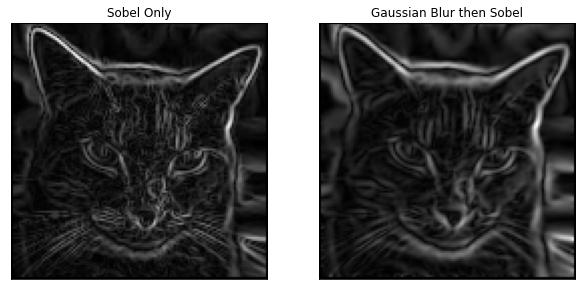

In [ ]:
img1 = np_cat[0]
sobeled_only = sobel(img1)

img2 = np_cat[0]
blurred = gaussian_blur(img2)
burred_then_sobeled = sobel(blurred)

def show_side_by_side(img1, img2, title1 = '', title2 = ''):
    plt.figure(figsize=(8, 8))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap=plt.cm.gray)
    if len(title1): plt.title(title1)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=plt.cm.gray)
    if len(title2): plt.title(title2)
    plt.xticks(())
    plt.yticks(())

show_side_by_side(sobeled_only, burred_then_sobeled, 'Sobel Only', 'Gaussian Blur then Sobel')

In [ ]:
np_sobel_cats = apply_to_all(np_cats, sobel)

NameError: ignored

In [ ]:
np_sobel_dogs = apply_to_all(np_dogs, sobel)

In [ ]:
flatten_sobel_cats = apply_to_all(np_cats, flatten)
flatten_sobel_dogs = apply_to_all(np_dogs, flatten)

NameError: ignored

In [ ]:
df_sobel_cat = pd.DataFrame.from_records(flatten_cats)
df_sobel_dog = pd.DataFrame.from_records(flatten_dogs)

In [ ]:
df_stat_sobel_cat = generate_df_stat(df_cat)
df_stat_sobel_dog = generate_df_stat(df_dog)